# investigating row arg for plotly subplots

In [1]:
import numpy as np
import pandas as pd

In [51]:
rng = np.random.default_rng(0)

df = pd.DataFrame(
    data=rng.random((32, 2)),
    index=pd.MultiIndex.from_product([["foo", "bar"], [1, 2], range(8)], names=list("ABC")),
    columns=["D", "E"],
)

df.sample(10, random_state=rng)

D         E
A   B C                    
bar 1 6  0.391619  0.890274
foo 1 1  0.040974  0.016528
bar 1 1  0.525354  0.310242
foo 1 7  0.729655  0.175656
      5  0.815854  0.002739
    2 3  0.670624  0.647190
bar 2 4  0.450339  0.796324
      0  0.084015  0.832644
    1 4  0.571530  0.321869
      5  0.594300  0.337911

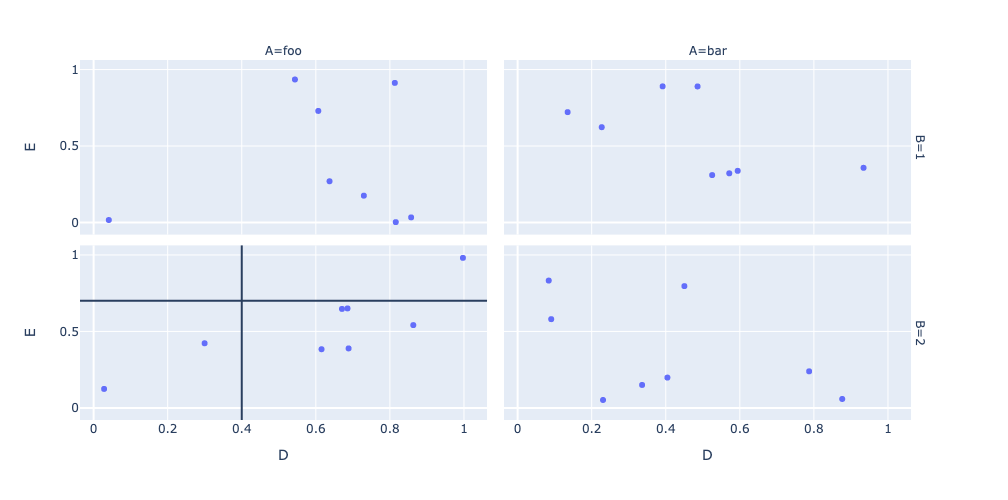

In [54]:
import plotly.express as px

fig = px.scatter(df.reset_index(), x="D", y="E", facet_col="A", facet_row="B")
fig.update_layout(width=500, height=500)
fig.add_hline(y=0.7, row=1, col=1)
fig.add_vline(x=0.4, row=1, col=1)

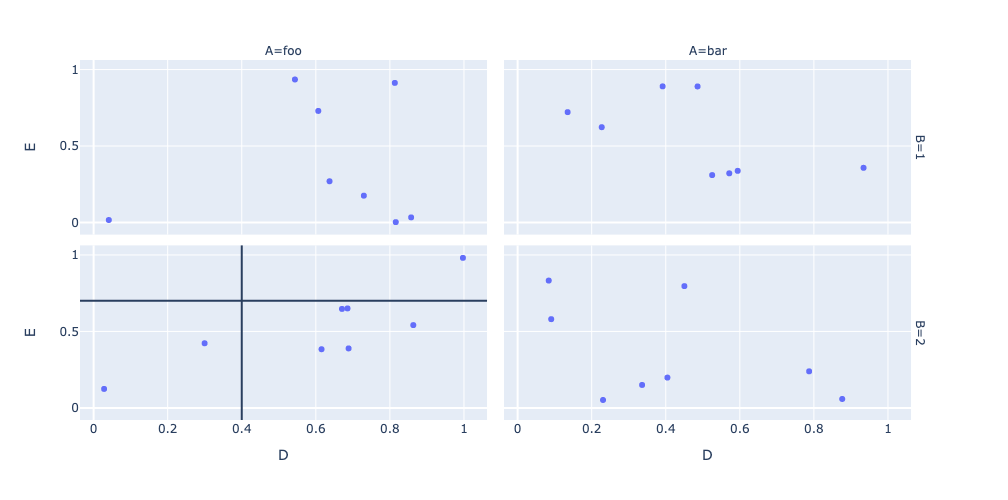

In [54]:
import plotly.express as px

fig = px.scatter(
    df.reset_index(),
    x="D",
    y="E",
    facet_col="A",
    facet_row="B",
)
fig.update_layout(width=500, height=500)
fig.add_hline(y=0.7, row=1, col=1)
fig.add_vline(x=0.4, row=1, col=1)

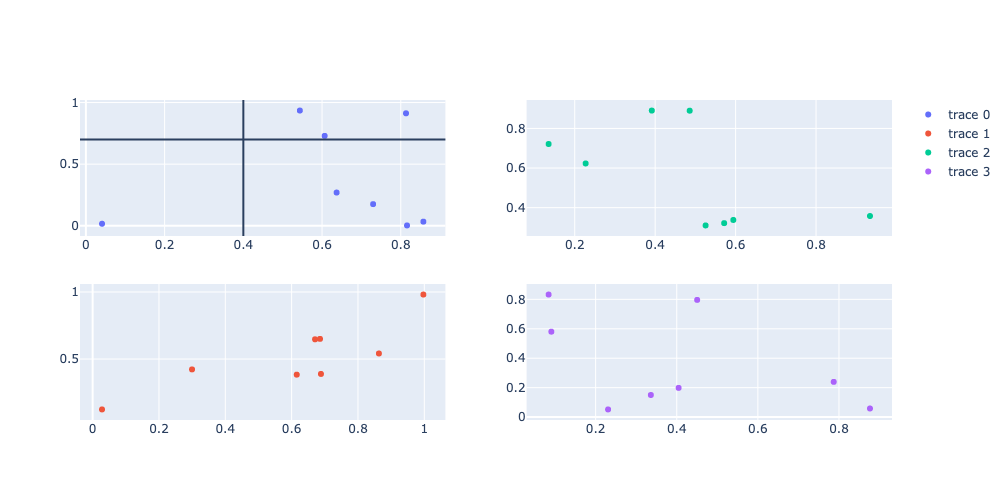

In [55]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2)

for j, col in enumerate(["foo", "bar"]):
    for i, row in enumerate([1, 2]):
        data = df.groupby(["A", "B"]).get_group((col, row))
        fig.add_trace(
            go.Scatter(
                x=data["D"],
                y=data["E"],
                mode="markers",
            ),
            row=i + 1,
            col=j + 1,
        )

fig.update_layout(width=500, height=500)
fig.add_hline(y=0.7, row=1, col=1)
fig.add_vline(x=0.4, row=1, col=1)